# Stochastic Calculus

## Deterministic dynamical systems

### Numerical solution of dynamical systems: inflation targetting

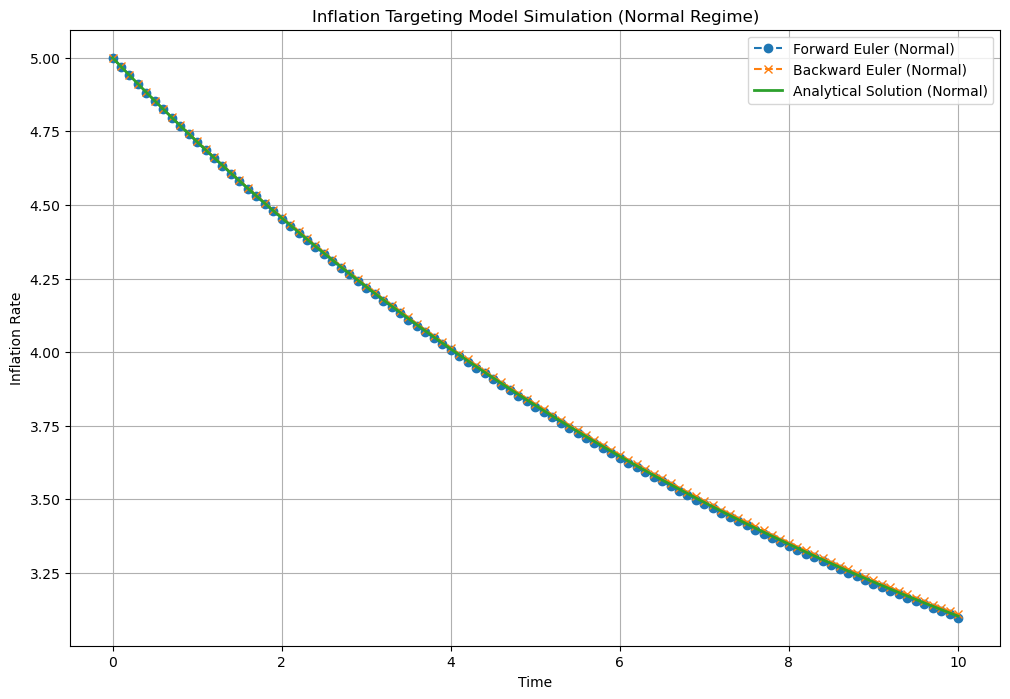

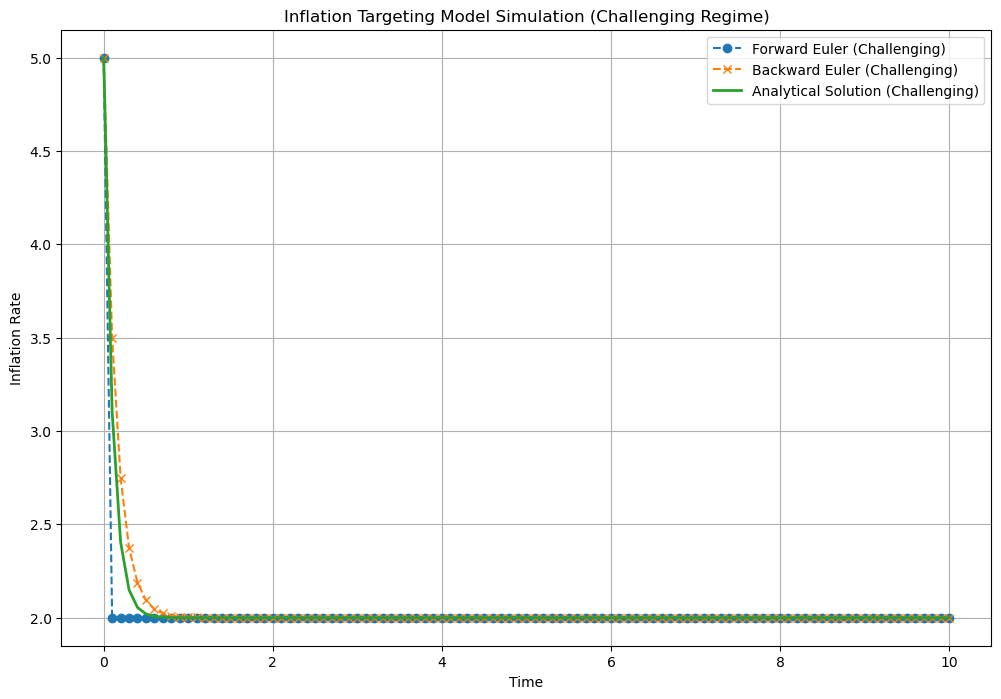

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_inflation(theta, pi_hat, pi_t0, Delta, N):
    # Time grid
    time = np.linspace(0, N * Delta, N + 1)

    # Arrays to store the results
    pi_forward = np.zeros(N + 1)
    pi_backward = np.zeros(N + 1)
    pi_analytical = np.zeros(N + 1)

    # Initial condition
    pi_forward[0] = pi_t0
    pi_backward[0] = pi_t0

    # Analytical Solution
    pi_analytical = pi_hat + (pi_t0 - pi_hat) * np.exp(-theta * time)

    # Forward Euler Scheme
    for i in range(N):
        pi_forward[i + 1] = pi_forward[i] + Delta * theta * (pi_hat - pi_forward[i])

    # Backward Euler Scheme
    for i in range(N):
        pi_backward[i + 1] = (pi_backward[i] + Delta * theta * pi_hat) / (1 + Delta * theta)

    return time, pi_forward, pi_backward, pi_analytical

# Parameters for normal regime
theta_normal = 0.1
Delta_normal = 0.1
pi_hat = 2.0
pi_t0 = 5.0
N = 100

# Parameters for challenging regime
theta_challenging = 10.0
Delta_challenging = 0.1

# Simulate for normal regime
time_normal, pi_forward_normal, pi_backward_normal, pi_analytical_normal = simulate_inflation(
    theta_normal, pi_hat, pi_t0, Delta_normal, N)

# Simulate for challenging regime
time_challenging, pi_forward_challenging, pi_backward_challenging, pi_analytical_challenging = simulate_inflation(
    theta_challenging, pi_hat, pi_t0, Delta_challenging, N)

# Plot the results for normal regime
plt.figure(figsize=(12, 8))
plt.plot(time_normal, pi_forward_normal, label='Forward Euler (Normal)', marker='o', linestyle='--')
plt.plot(time_normal, pi_backward_normal, label='Backward Euler (Normal)', marker='x', linestyle='--')
plt.plot(time_normal, pi_analytical_normal, label='Analytical Solution (Normal)', linestyle='-', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.title('Inflation Targeting Model Simulation (Normal Regime)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results for challenging regime
plt.figure(figsize=(12, 8))
plt.plot(time_challenging, pi_forward_challenging, label='Forward Euler (Challenging)', marker='o', linestyle='--')
plt.plot(time_challenging, pi_backward_challenging, label='Backward Euler (Challenging)', marker='x', linestyle='--')
plt.plot(time_challenging, pi_analytical_challenging, label='Analytical Solution (Challenging)', linestyle='-', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.title('Inflation Targeting Model Simulation (Challenging Regime)')
plt.legend()
plt.grid(True)
plt.show()


## The Wiener Process
### Simulation of the Wiener process (univariate)

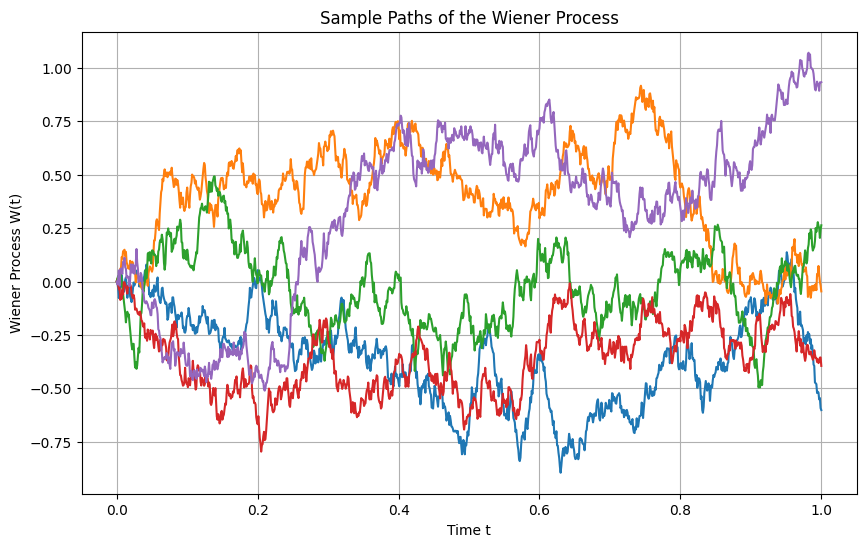

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters for the Wiener process
T = 1.0  # total time
n = 1000  # number of steps
dt = T / n  # time increment
t = np.linspace(0, T, n+1)  # time points

# Number of paths to simulate
num_paths = 5

# Set up the plot
plt.figure(figsize=(10, 6))

# Simulate multiple paths
for _ in range(num_paths):
    W = np.zeros(n+1)  # Initialize the Wiener process for each path
    for i in range(n):
        W[i+1] = W[i] + np.sqrt(dt) * np.random.randn()
    plt.plot(t, W, label=f'Path {_+1}')

# Customize the plot
plt.title('Sample Paths of the Wiener Process')
plt.xlabel('Time t')
plt.ylabel('Wiener Process W(t)')
plt.grid(True)

# Show the plot
plt.show()


#### Simulation using Gaussian processes

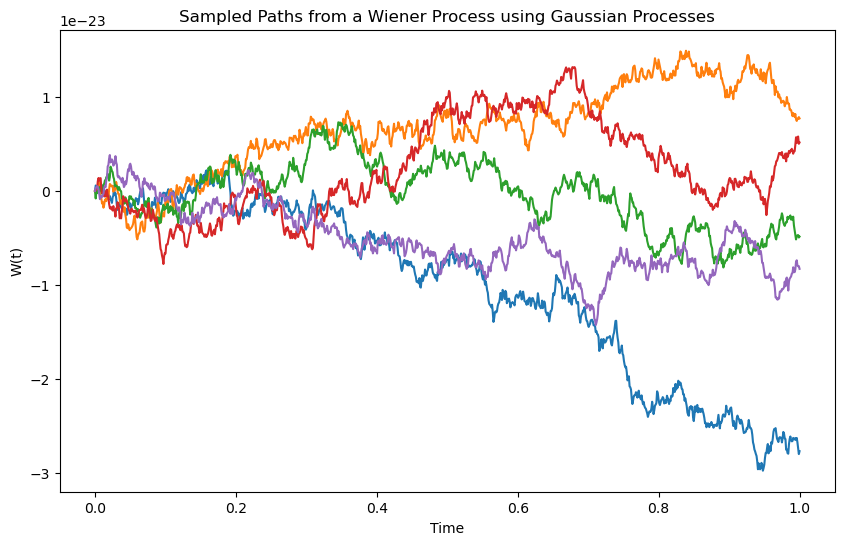

In [46]:
    import GPy
    import numpy as np
    import matplotlib.pyplot as plt

    # Time points at which to sample the Wiener process
    t = np.linspace(0, 1, 1000).reshape(-1, 1)

    # Define the Brownian motion kernel
    brownian_kernel = GPy.kern.Brownian(input_dim=1, variance=1.0)

    # Create a GP model with zero mean function
    mean_function = GPy.mappings.Constant(input_dim=1, output_dim=1, value=0)
    model = GPy.models.GPRegression(t, np.zeros_like(t), kernel=brownian_kernel, mean_function=mean_function)

    # Ensure correct model optimization
    model.optimize()

    # Sample paths from the GP model
    num_samples = 5
    samples = model.posterior_samples_f(t, size=num_samples)

    # Plot the sampled paths
    plt.figure(figsize=(10, 6))
    for i in range(num_samples):
        plt.plot(t, samples[:, :, i], label=f'Sample {i+1}')
    plt.title('Sampled Paths from a Wiener Process using Gaussian Processes')
    plt.xlabel('Time')
    plt.ylabel('W(t)')
    plt.show()


## Brownian motion with drift
### Simulation using discrete paths

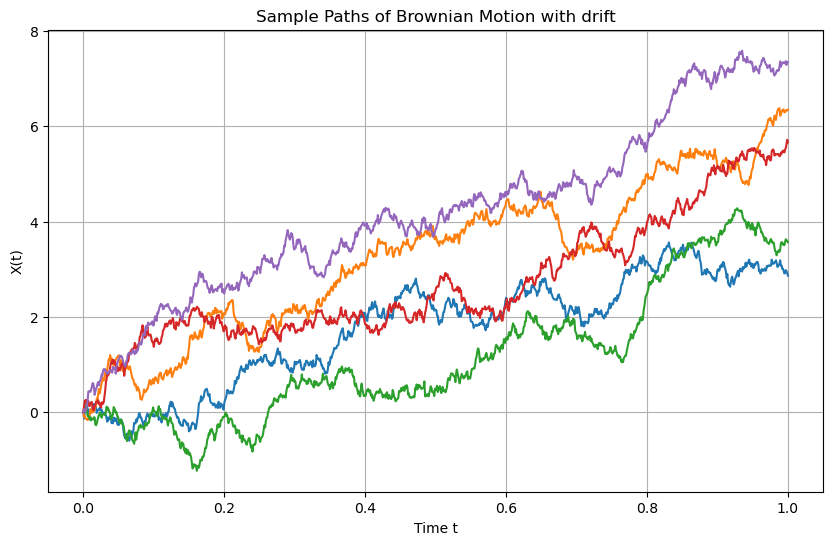

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters for Brownian motion with drift and volatility
T = 1.0    # total time
n = 1000   # number of steps
dt = T / n  # time increment
t = np.linspace(0, T, n+1)  # time points

# Brownian motion parameters
mu = 5    # drift
sigma = 2.0  # volatility

# Number of paths to simulate
num_paths = 5

# Set up the plot
plt.figure(figsize=(10, 6))

# Simulate multiple paths
for _ in range(num_paths):
    X = np.zeros(n+1)  # Initialize the process for each path
    for i in range(n):
        X[i+1] = X[i] + mu * dt + sigma * np.sqrt(dt) * np.random.randn()
    plt.plot(t, X, label=f'Path {_+1}')

# Customize the plot
plt.title('Sample Paths of Brownian Motion with drift')
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.grid(True)

# Show the plot
plt.show()


### Simulation using Gaussian Processes

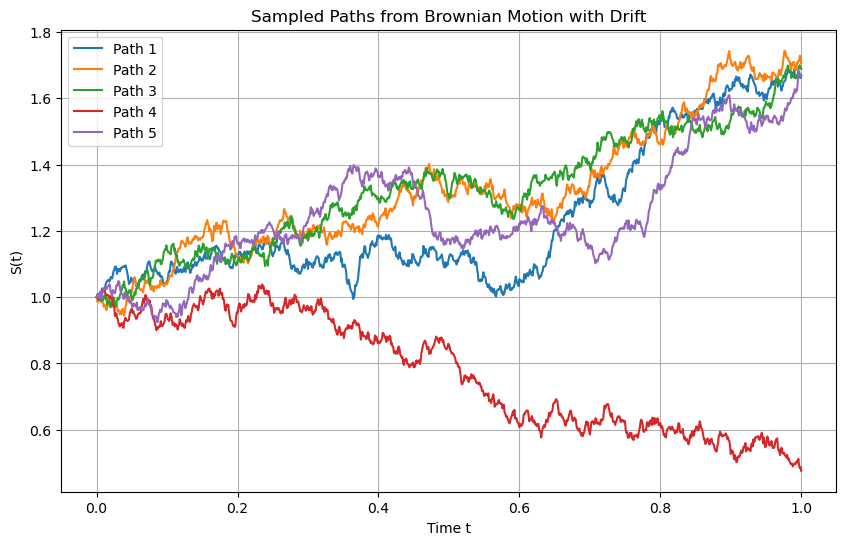

In [12]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Brownian motion with drift
S0 = 0.0    # Initial value
mu = 0.5    # Drift coefficient
sigma = 0.3  # Volatility
T = 1.0    # Total time
n = 1000   # Number of steps
t = np.linspace(0, T, n+1).reshape(-1, 1)  # Time points

# Define the custom kernel for Brownian motion
class BrownianMotionKernel(GPy.kern.Kern):
    def __init__(self, input_dim, sigma=1.0, active_dims=None):
        super(BrownianMotionKernel, self).__init__(input_dim, active_dims, 'Brownian')
        self.sigma = GPy.core.Param('sigma', sigma)
        self.link_parameters(self.sigma)
    
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        t1 = X
        t2 = X2.T
        # Covariance function of Brownian motion: sigma^2 * min(s, t)
        cov_matrix = self.sigma**2 * np.minimum(t1, t2)
        return cov_matrix
    
    def Kdiag(self, X):
        return self.sigma**2 * X[:, 0]
    
    # No-op for gradient update since we are not optimizing the kernel
    def update_gradients_full(self, dL_dK, X, X2=None):
        pass
    
    # No-op for kernel gradient since we are not optimizing the kernel
    def gradients_X(self, dL_dK, X, X2=None):
        return np.zeros(X.shape)

# Custom mean function to include drift
class BrownianMotionMean(GPy.core.Mapping):
    def __init__(self, input_dim, output_dim, S0=0.0, mu=0.0):
        super(BrownianMotionMean, self).__init__(input_dim, output_dim)
        self.S0 = S0  # Initial value
        self.mu = mu  # Drift coefficient
        
    def f(self, X):
        # Mean function: S0 + mu * t
        return self.S0 + self.mu * X
    
    def update_gradients(self, dL_df, X):
        pass

    def gradients_X(self, dL_df, X):
        return np.zeros(X.shape)

# Instantiate the Brownian motion kernel with parameters
bm_kernel = BrownianMotionKernel(input_dim=1, sigma=sigma)

# Instantiate the mean function with S0 and mu
mean_function = BrownianMotionMean(input_dim=1, output_dim=1, S0=S0, mu=mu)

# Provide the initial observation at t=0
t_data = np.array([[0.0]])
Y_data = np.array([[S0]])

# Create a GP model with the custom mean function and Brownian motion kernel
model = GPy.models.GPRegression(t_data, Y_data, kernel=bm_kernel, mean_function=mean_function)

# Set noise variance to a negligible value since we're simulating without observation noise
model.likelihood.variance.fix(1e-10)

# Sample paths from the GP model
num_samples = 5
samples = model.posterior_samples_f(t, size=num_samples)

# Plot the sampled paths
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(t, samples[:, :, i], label=f'Path {i+1}')
plt.title(f'Sampled Paths from Brownian Motion with Drift')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.legend()
plt.show()


## Arithmetic Average of the Brownian Motion

### Simulation using discrete paths

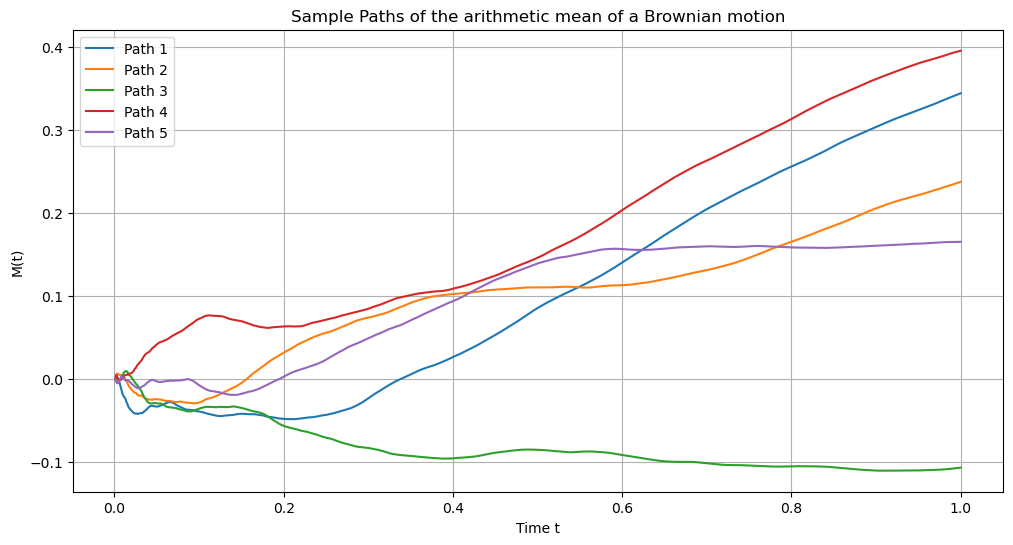

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters for Brownian motion with drift and volatility
T = 1.0    # total time
n = 1000   # number of steps
dt = T / n  # time increment
t = np.linspace(dt, T, n)  # time points starting from dt to avoid division by zero

# Brownian motion parameters
S0 = 0.0   # initial value of S_u
mu = 0.5   # drift coefficient
sigma = 0.3  # volatility

# Number of paths to simulate
num_paths = 5

# Initialize array to store M_t for each path
M_t_paths = np.zeros((n, num_paths))

# Set up the plot
plt.figure(figsize=(12, 6))

# Simulate multiple paths
for path in range(num_paths):
    # Initialize S_u for each path
    S = np.zeros(n + 1)  # n+1 because we include S0
    S[0] = S0
    # Simulate S_u using Euler-Maruyama method
    for i in range(n):
        dW = np.sqrt(dt) * np.random.randn()  # Brownian increment
        S[i + 1] = S[i] + mu * dt + sigma * dW
    # Compute cumulative sum to approximate the integral
    cumulative_S = np.cumsum(S[:-1]) * dt  # Exclude the last S[n+1]
    # Compute M_t at each time point
    M_t = cumulative_S / t
    M_t_paths[:, path] = M_t
    # Plot the path
    plt.plot(t, M_t, label=f'Path {path + 1}')

# Customize the plot
plt.title('Sample Paths of the arithmetic mean of a Brownian motion')
plt.xlabel('Time t')
plt.ylabel('M(t)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


### Simulation using Gaussian Processes

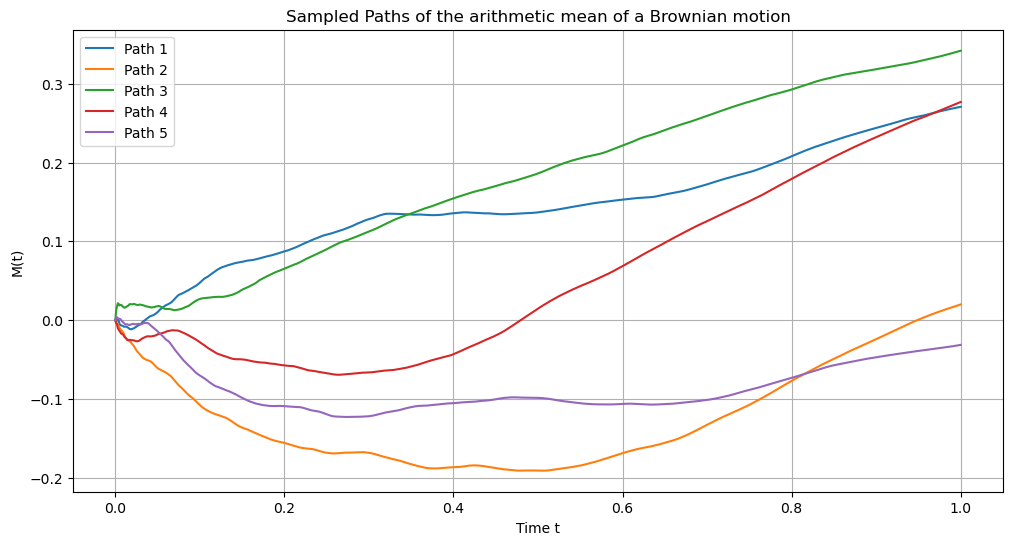

In [33]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Brownian motion with drift
S0 = 0.0    # Initial value
mu = 0.5    # Drift coefficient
sigma = 0.3  # Volatility
T = 1.0    # Total time
n = 1000   # Number of steps
t = np.linspace(1e-6, T, n+1).reshape(-1, 1)  # Time points, avoid t=0 to prevent division by zero

# Define the custom kernel based on the provided covariance function
class TimeAverageKernel(GPy.kern.Kern):
    def __init__(self, input_dim, sigma=1.0, active_dims=None):
        super(TimeAverageKernel, self).__init__(input_dim, active_dims, 'TimeAverage')
        self.sigma = GPy.core.Param('sigma', sigma)
        self.link_parameters(self.sigma)
        
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        t1 = X[:, 0].reshape(-1, 1)  # Column vector
        t2 = X2[:, 0].reshape(1, -1)  # Row vector
        t_min = np.minimum(t1, t2)
        t_max = np.maximum(t1, t2)
        # Compute the covariance matrix using the given formula
        cov_matrix = self.sigma ** 2 * (t_min / 2) * (1 - t_min / (3 * t_max))
        return cov_matrix
        
    def Kdiag(self, X):
        t = X[:, 0]
        # Compute the diagonal elements of the covariance matrix
        cov_diag = self.sigma ** 2 * (t / 2) * (1 - t / (3 * t))
        # Simplify the expression
        cov_diag = self.sigma ** 2 * (t / 2) * (1 - 1 / 3)
        cov_diag = self.sigma ** 2 * (t / 2) * (2 / 3)
        cov_diag = self.sigma ** 2 * t * (1 / 3)
        return cov_diag
        
    def update_gradients_full(self, dL_dK, X, X2=None):
        pass
        
    def gradients_X(self, dL_dK, X, X2=None):
        return np.zeros(X.shape)

# Custom mean function to include drift
class TimeAverageMean(GPy.core.Mapping):
    def __init__(self, input_dim, output_dim, S0=0.0, mu=0.0):
        super(TimeAverageMean, self).__init__(input_dim, output_dim)
        self.S0 = S0  # Initial value
        self.mu = mu  # Drift coefficient
        
    def f(self, X):
        t = X[:, 0]
        mean = self.S0 + 0.5 * self.mu * t
        return mean.reshape(-1, 1)
        
    def update_gradients(self, dL_df, X):
        pass
    
    def gradients_X(self, dL_df, X):
        return np.zeros(X.shape)

# Instantiate the Time Average kernel with parameters
ta_kernel = TimeAverageKernel(input_dim=1, sigma=sigma)

# Instantiate the mean function with S0 and mu
mean_function = TimeAverageMean(input_dim=1, output_dim=1, S0=S0, mu=mu)

# Provide the initial observation at t=1e-6 (approaching zero)
t_data = np.array([[1e-6]])
Y_data = mean_function.f(t_data)  # Mean at t=1e-6

# Create a GP model with the custom mean function and Time Average kernel
model = GPy.models.GPRegression(t_data, Y_data, kernel=ta_kernel, mean_function=mean_function)

# Set noise variance to a negligible value since we're simulating without observation noise
model.likelihood.variance.fix(1e-10)

# Sample paths from the GP model
num_samples = 5
samples = model.posterior_samples_f(t, size=num_samples)

# Plot the sampled paths
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.plot(t, samples[:, :, i], label=f'Path {i+1}')
plt.title('Sampled Paths of the arithmetic mean of a Brownian motion')
plt.xlabel('Time t')
plt.ylabel('M(t)')
plt.grid(True)
plt.legend()
plt.show()


## Geometric Brownian Motion

### Simulation using discrete paths

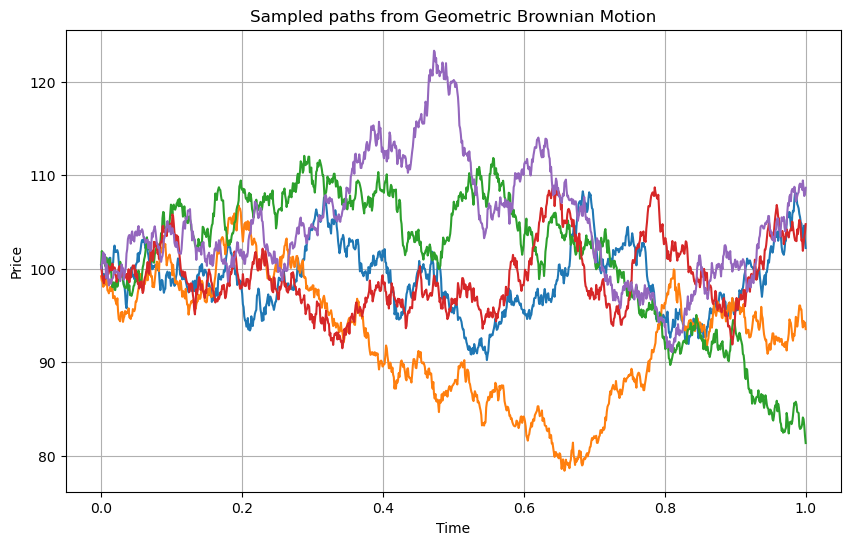

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, N, num_paths):
    dt = T / N
    t = np.linspace(0, T, N)
    paths = []
    for _ in range(num_paths):
        W = np.random.normal(0, np.sqrt(dt), N)
        W = np.cumsum(W)  # cumulative sum to represent Brownian motion
        S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
        paths.append(S)
    return t, paths

# Parameters
S0 = 100  # Initial value of the asset
mu = 0.05  # Drift
sigma = 0.2  # Volatility
T = 1  # Time horizon (1 year)
N = 1000  # Number of time steps
num_paths = 5  # Number of paths to simulate

t, paths = simulate_gbm(S0, mu, sigma, T, N, num_paths)

# Plotting the simulated GBM paths
plt.figure(figsize=(10, 6))
for i, S in enumerate(paths):
    plt.plot(t, S, label=f'Path {i + 1}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Sampled paths from Geometric Brownian Motion')
plt.grid(True)
plt.show()

### Simulation using Gaussian Processes

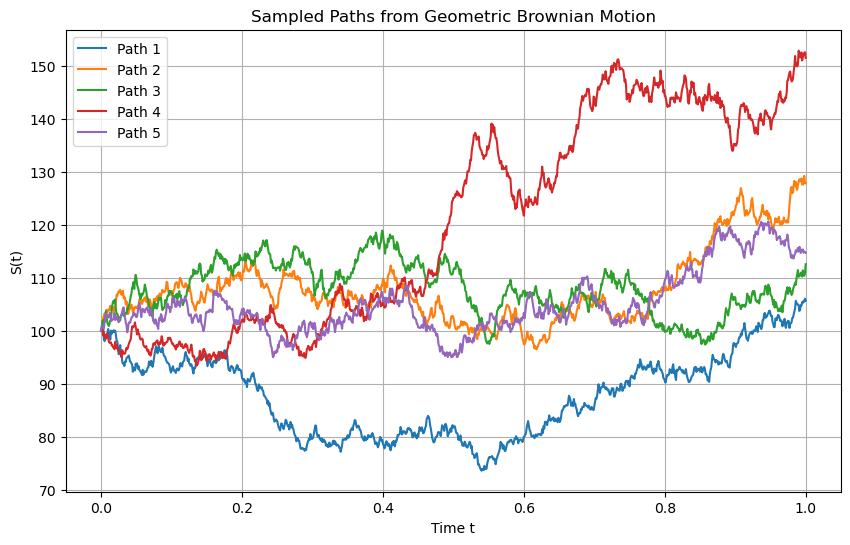

In [13]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Geometric Brownian Motion
S0 = 100  # Initial value of the asset
mu = 0.05  # Drift
sigma = 0.2  # Volatility
T = 1  # Time horizon (1 year)
n = 1000   # Number of steps
t = np.linspace(0, T, n+1).reshape(-1, 1)  # Time points

# Define the custom kernel for Brownian motion
class GBMKernel(GPy.kern.Kern):
    def __init__(self, input_dim, sigma=1.0, active_dims=None):
        super(GBMKernel, self).__init__(input_dim, active_dims, 'Brownian')
        self.sigma = GPy.core.Param('sigma', sigma)
        self.link_parameters(self.sigma)
    
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        t1 = X
        t2 = X2.T
        # Covariance function of Brownian motion: sigma^2 * min(s, t)
        cov_matrix = self.sigma**2 * np.minimum(t1, t2)
        return cov_matrix
    
    def Kdiag(self, X):
        return self.sigma**2 * X[:, 0]
    
    # No-op for gradient update since we are not optimizing the kernel
    def update_gradients_full(self, dL_dK, X, X2=None):
        pass
    
    # No-op for kernel gradient since we are not optimizing the kernel
    def gradients_X(self, dL_dK, X, X2=None):
        return np.zeros(X.shape)

# Custom mean function to include drift
class GBMMean(GPy.core.Mapping):
    def __init__(self, input_dim, output_dim, S0=0.0, mu=0.0):
        super(GBMMean, self).__init__(input_dim, output_dim)
        self.S0 = S0  # Initial value
        self.mu = mu  # Drift coefficient
        
    def f(self, X):
        # Mean function: S0 + mu * t
        return self.S0 + self.mu * X
    
    def update_gradients(self, dL_df, X):
        pass

    def gradients_X(self, dL_df, X):
        return np.zeros(X.shape)

# Instantiate the Brownian motion kernel with parameters
bm_kernel = GBMKernel(input_dim=1, sigma=sigma)

# Instantiate the mean function with S0 and mu
mean_function = GBMMean(input_dim=1, output_dim=1, S0=np.log(S0), mu=mu)

# Provide the initial observation at t=0
t_data = np.array([[0.0]])
Y_data = np.array([[np.log(S0)]])

# Create a GP model with the custom mean function and Brownian motion kernel
model = GPy.models.GPRegression(t_data, Y_data, kernel=bm_kernel, mean_function=mean_function)

# Set noise variance to a negligible value since we're simulating without observation noise
model.likelihood.variance.fix(1e-10)

# Sample paths from the GP model
num_samples = 5
samples = model.posterior_samples_f(t, size=num_samples)

# Transform samples to original GBM scale
gbm_samples = np.exp(samples)

# Plot the sampled paths
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(t, gbm_samples[:, :, i], label=f'Path {i+1}')
plt.title(f'Sampled Paths from Geometric Brownian Motion')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.legend()
plt.show()

## Orstein - Uhlenbeck process

### Simulation using discrete paths

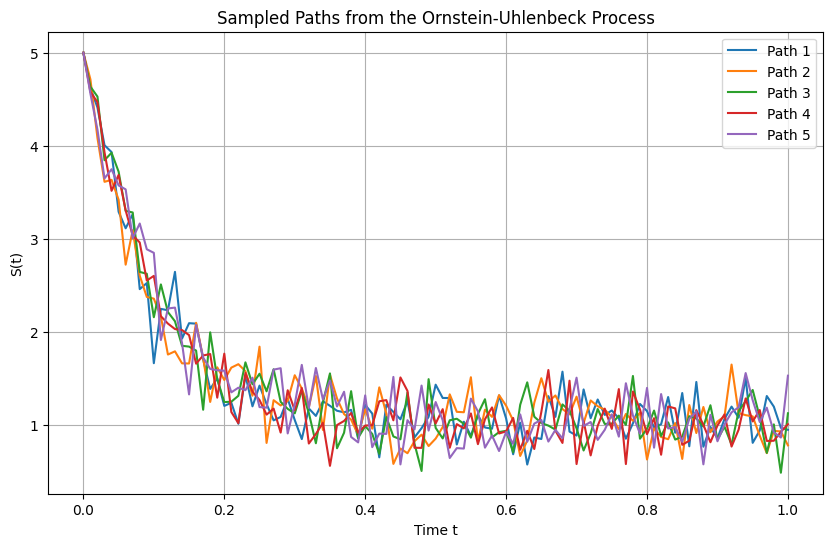

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Ornstein-Uhlenbeck process
S0 = 5.0    # Initial value
mu = 1.0    # Long-term mean
theta = 10  # Rate of mean reversion
sigma = 1 # Volatility
T = 1.0    # Total time
n = 100   # Number of steps
dt = T / n  # Time step size
t = np.linspace(0, T, n+1)  # Time points

# Number of paths to simulate
num_paths = 5

# Set up the plot
plt.figure(figsize=(10, 6))

# Simulate multiple paths
for _ in range(num_paths):
    S = np.zeros(n+1)  # Initialize the process
    S[0] = S0  # Set initial value

    for i in range(1, n+1):
        # Compute the mean and variance for the next step
        mean = S0 * np.exp(-theta * t[i]) + mu * (1 - np.exp(-theta * t[i]))
        variance = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t[i]))
        
        # Sample from the normal distribution with the computed mean and variance
        S[i] = np.random.normal(mean, np.sqrt(variance))

    # Plot the Ornstein-Uhlenbeck path
    plt.plot(t, S, label=f'Path {_+1}')

# Customize the plot
plt.title('Sampled Paths from the Ornstein-Uhlenbeck Process')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.legend()
plt.show()


### Simulation using Gaussian Processes

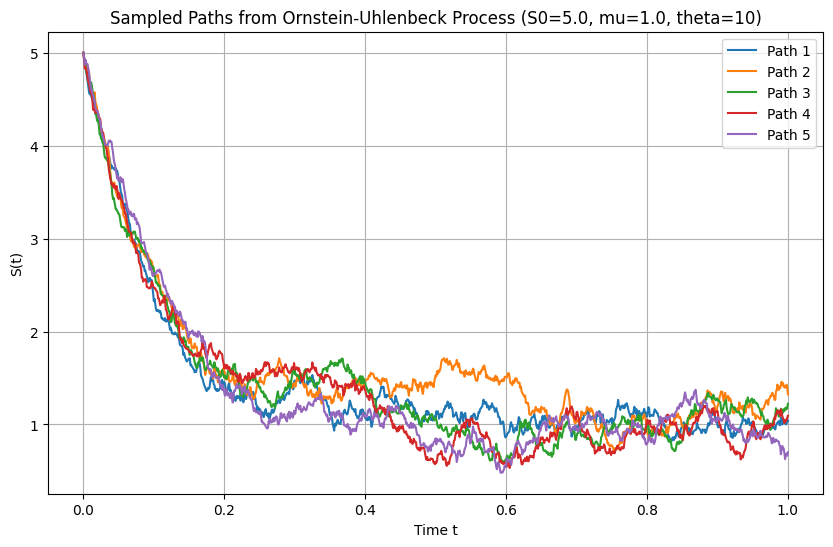

In [39]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Ornstein-Uhlenbeck process
S0 = 5.0    # Initial value
mu = 1.0    # Long-term mean
theta = 10  # Rate of mean reversion
sigma = 1 # Volatility
T = 1.0    # Total time
n = 1000   # Number of steps
t = np.linspace(0, T, n+1).reshape(-1, 1)  # Time points

# Define the custom kernel for the Ornstein-Uhlenbeck process
class OrnsteinUhlenbeckKernel(GPy.kern.Kern):
    def __init__(self, input_dim, theta=1.0, sigma=1.0, active_dims=None):
        super(OrnsteinUhlenbeckKernel, self).__init__(input_dim, active_dims, 'OU')
        self.theta = GPy.core.Param('theta', theta)
        self.sigma = GPy.core.Param('sigma', sigma)
        self.link_parameters(self.theta, self.sigma)
    
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        t1 = X
        t2 = X2.T
        min_t = np.minimum(t1, t2)
        # Covariance function of the Ornstein-Uhlenbeck process
        cov_matrix = (self.sigma**2 / (2 * self.theta)) * np.exp(-self.theta * np.abs(t1 - t2)) * (1 - np.exp(-2 * self.theta * min_t))
        return cov_matrix
    
    def Kdiag(self, X):
        return (self.sigma**2 / (2 * self.theta)) * (1 - np.exp(-2 * self.theta * X[:, 0]))
    
    # No-op for gradient update since we are not optimizing the kernel
    def update_gradients_full(self, dL_dK, X, X2=None):
        pass
    
    # No-op for kernel gradient since we are not optimizing the kernel
    def gradients_X(self, dL_dK, X, X2=None):
        return np.zeros(X.shape)

# Custom mean function to include mean-reverting drift toward mu
class OUProcessMean(GPy.core.Mapping):
    def __init__(self, input_dim, output_dim, S0=0.0, mu=0.0, theta=1.0):
        super(OUProcessMean, self).__init__(input_dim, output_dim)
        self.S0 = S0  # Initial value
        self.mu = mu  # Long-term mean
        self.theta = theta  # Rate of mean reversion
        
    def f(self, X):
        # Mean function: S_0 * exp(-theta * t) + mu * (1 - exp(-theta * t))
        return self.S0 * np.exp(-self.theta * X) + self.mu * (1 - np.exp(-self.theta * X))
        
    def update_gradients(self, dL_df, X):
        pass
    
    def gradients_X(self, dL_df, X):
        return np.zeros(X.shape)

# Instantiate the OU kernel with parameters
ou_kernel = OrnsteinUhlenbeckKernel(input_dim=1, theta=theta, sigma=sigma)

# Instantiate the mean function with non-zero initial value S0 and long-term mean mu
mean_function = OUProcessMean(input_dim=1, output_dim=1, S0=S0, mu=mu, theta=theta)

# Provide the initial observation at t=0
t_data = np.array([[0.0]])
Y_data = np.array([[S0]])

# Create a GP model with the custom mean function and OU kernel
model = GPy.models.GPRegression(t_data, Y_data, kernel=ou_kernel, mean_function=mean_function)

# Set noise variance to a negligible value since we're simulating without observation noise
model.likelihood.variance.fix(1e-10)

# Sample paths from the GP model
num_samples = 5
samples = model.posterior_samples_f(t, size=num_samples)

# Plot the sampled paths
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(t, samples[:, :, i], label=f'Path {i+1}')
plt.title(f'Sampled Paths from Ornstein-Uhlenbeck Process (S0={S0}, mu={mu}, theta={theta})')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.legend()
plt.show()


## Brownian bridge 
### Simulation using discrete paths

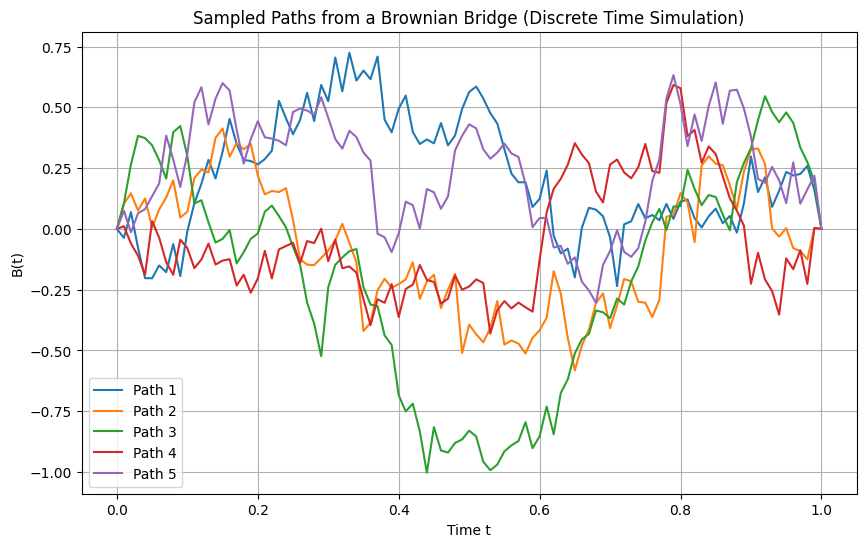

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Brownian bridge
T = 1.0    # Total time
n = 100   # Number of steps
dt = T / n  # Time step size
t = np.linspace(0, T, n+1)  # Time points

# Number of paths to simulate
num_paths = 5

# Set up the plot
plt.figure(figsize=(10, 6))

# Simulate multiple paths
for _ in range(num_paths):
    W = np.zeros(n+1)  # Initialize the Wiener process
    for i in range(1, n+1):
        W[i] = W[i-1] + np.sqrt(dt) * np.random.randn()  # Standard Wiener process

    # Adjust Wiener process to form a Brownian bridge
    B = W - (t / T) * W[-1]  # Brownian bridge: W(t) - (t/T) * W(T)

    # Plot the Brownian bridge path
    plt.plot(t, B, label=f'Path {_+1}')

# Customize the plot
plt.title('Sampled Paths from a Brownian Bridge (Discrete Time Simulation)')
plt.xlabel('Time t')
plt.ylabel('B(t)')
plt.grid(True)
plt.legend()
plt.show()


### Simulation using Gaussian processes

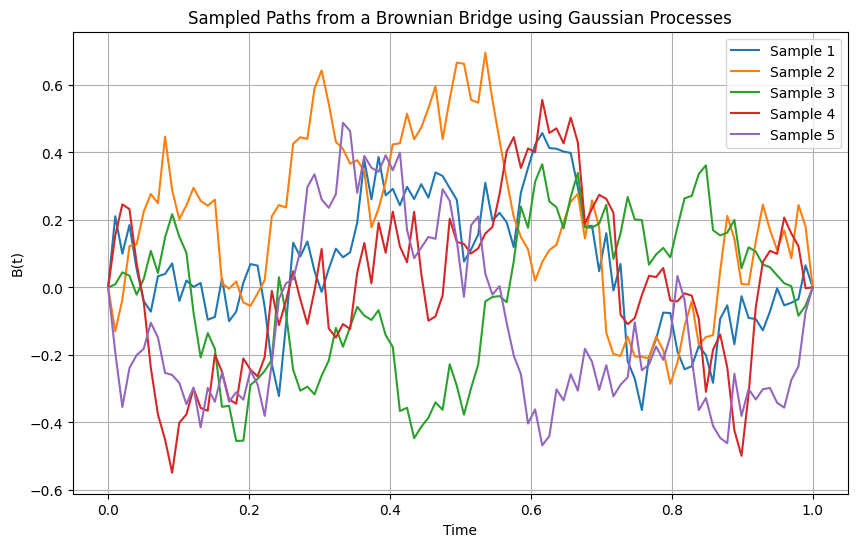

In [31]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# Time points at which to sample the Brownian bridge
T = 1.0
t = np.linspace(0, T, 100).reshape(-1, 1)

# Define a custom kernel for the Brownian bridge
class BrownianBridgeKernel(GPy.kern.Kern):
    def __init__(self, input_dim, variance=1.0, active_dims=None):
        super(BrownianBridgeKernel, self).__init__(input_dim, active_dims, 'brownian_bridge')
        self.variance = GPy.core.Param('variance', variance)
        self.link_parameter(self.variance)
    
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        t1 = X
        t2 = X2.T
        T = np.max(X)
        # Brownian bridge kernel: min(t1, t2) - (t1 * t2) / T
        cov_matrix = np.minimum(t1, t2) - (t1 * t2) / T
        return self.variance * cov_matrix
    
    def Kdiag(self, X):
        return self.variance * (X[:, 0] - (X[:, 0]**2) / T)
    
    # No-op for gradient update since we are not optimizing the kernel
    def update_gradients_full(self, dL_dK, X, X2=None):
        pass
    
    # No-op for kernel gradient since we are not optimizing the kernel
    def gradients_X(self, dL_dK, X, X2=None):
        return np.zeros(X.shape)

# Instantiate the Brownian bridge kernel with variance 1
brownian_bridge_kernel = BrownianBridgeKernel(input_dim=1, variance=1.0)

# Create a GP model with zero mean function
mean_function = GPy.mappings.Constant(input_dim=1, output_dim=1, value=0)
model = GPy.models.GPRegression(t, np.zeros_like(t), kernel=brownian_bridge_kernel, mean_function=mean_function)

# Sample paths from the GP model without optimizing (since Brownian bridge doesn't require fitting)
num_samples = 5
samples = model.posterior_samples_f(t, size=num_samples)

# Plot the sampled paths
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(t, samples[:, :, i], label=f'Sample {i+1}')
plt.title('Sampled Paths from a Brownian Bridge using Gaussian Processes')
plt.xlabel('Time')
plt.ylabel('B(t)')
plt.grid(True)
plt.legend()
plt.show()


## Jump processes 
### Homogeneous Poisson process simulation

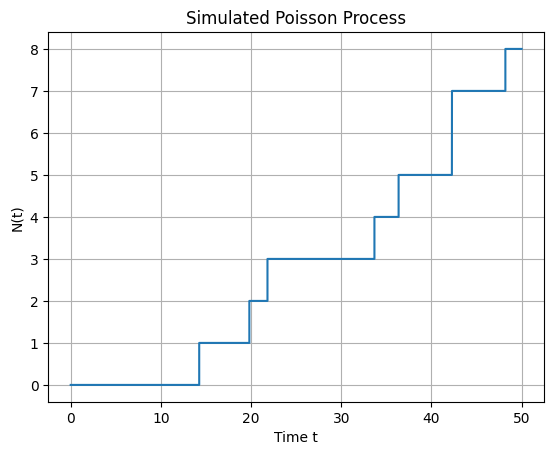

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 0.2   # The rate parameter λ of the Poisson process
T = 50             # Total time
delta_t = 0.01      # Time-step Δt
num_steps = int(T / delta_t)  # Number of time steps

# Time grid
t = np.linspace(0, T, num_steps + 1)

# Initialize N_t
N_t = np.zeros(num_steps + 1, dtype=int)

# Simulate the Poisson process
for i in range(1, num_steps + 1):
    # Generate a random number between 0 and 1
    u = np.random.rand()
    # If u < λΔt, increment N_t
    if u < lambda_rate * delta_t:
        N_t[i] = N_t[i - 1] + 1
    else:
        N_t[i] = N_t[i - 1]

# Plot the Poisson process
plt.step(t, N_t, where='post')
plt.xlabel('Time t')
plt.ylabel('N(t)')
plt.title('Simulated Poisson Process')
plt.grid(True)
plt.show()


### Hawkes process

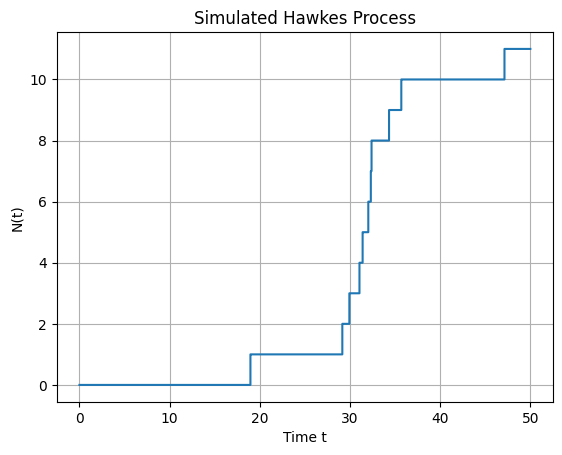

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.2       # Baseline intensity (μ)
alpha = 0.5   # Excitation parameter (α)
beta = 1     # Decay rate (β)
T = 50         # Total time to simulate
delta_t = 0.01 # Time-step Δt

# Time grid
time_grid = np.arange(0, T + delta_t, delta_t)
num_steps = len(time_grid)

# Initialize N_t and event times
N_t = np.zeros(num_steps, dtype=int)
event_times = []

# Simulate the Hawkes process
for i in range(1, num_steps):
    t_i = time_grid[i]
    
    # Compute lambda_t
    lambda_t = mu
    if event_times:
        tau_array = np.array(event_times)
        lambda_t += np.sum(alpha * np.exp(-beta * (t_i - tau_array)))
    
    # Calculate the event probability
    p = lambda_t * delta_t
    if p > 1.0:
        p = 1.0  # Ensure probability does not exceed 1
    
    # Simulate event occurrence
    u = np.random.rand()
    if u < p:
        N_t[i] = N_t[i - 1] + 1
        event_times.append(t_i)
    else:
        N_t[i] = N_t[i - 1]

# Plot the counting process
#plt.figure(figsize=(12, 6))
plt.step(time_grid, N_t, where='post')
plt.xlabel('Time t')
plt.ylabel('N(t)')
plt.title('Simulated Hawkes Process')
plt.grid(True)
plt.show()


### Compound Poisson process

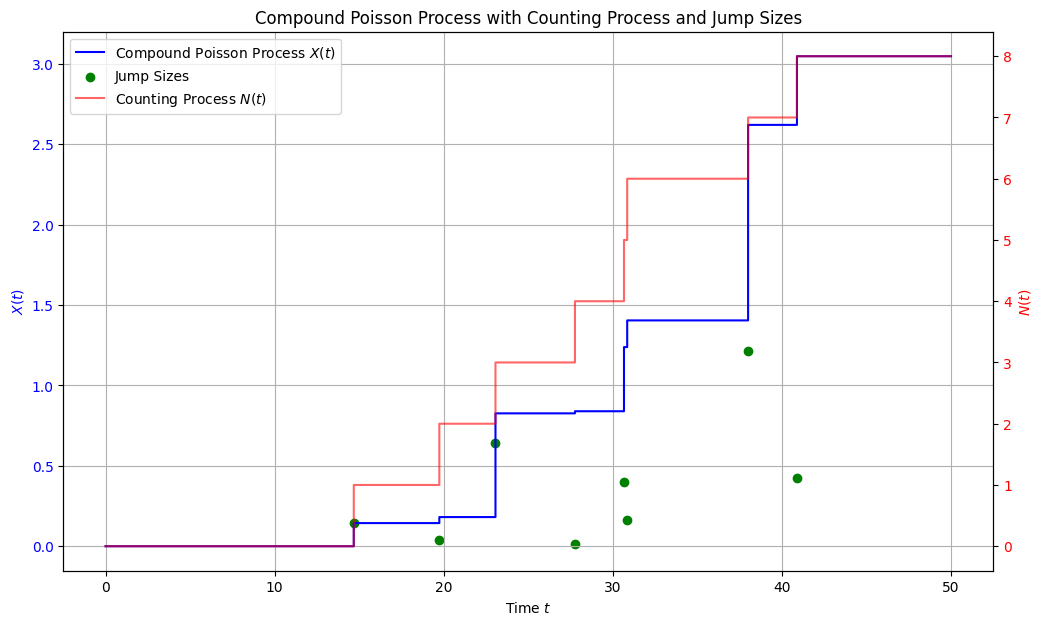

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 0.2   # Rate parameter λ of the Poisson process
T = 50              # Total simulation time
delta_t = 0.01      # Time-step Δt
num_steps = int(T / delta_t)
time_grid = np.linspace(0, T, num_steps + 1)

# Jump size distribution parameters
eta = 2.5  # Rate parameter of the exponential distribution for jump sizes

# Initialize arrays
N_t = np.zeros(num_steps + 1, dtype=int)  # Counting process N(t)
X_t = np.zeros(num_steps + 1)             # Compound Poisson process X(t)
event_times = []                          # Times when events occur
jump_sizes = []                           # Sizes of the jumps

# Simulate the compound Poisson process
for i in range(1, num_steps + 1):
    t = time_grid[i]
    # Probability of an event in [t_i, t_i + delta_t)
    p = lambda_rate * delta_t
    # Ensure probability does not exceed 1
    p = min(p, 1.0)
    # Determine if an event occurs
    if np.random.rand() < p:
        N_t[i] = N_t[i - 1] + 1
        # Sample a jump size Y_i from an exponential distribution
        Y_i = np.random.exponential(scale=1/eta)
        jump_sizes.append(Y_i)
        event_times.append(t)
        X_t[i] = X_t[i - 1] + Y_i
    else:
        N_t[i] = N_t[i - 1]
        X_t[i] = X_t[i - 1]

# Plot all three visualizations in one figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot the compound Poisson process X(t)
ax1.step(time_grid, X_t, where='post', label='Compound Poisson Process $X(t)$', color='blue')
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('$X(t)$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot jump sizes as scatter points on X(t)
event_indices = [np.searchsorted(time_grid, t) for t in event_times]
event_values = [X_t[idx] for idx in event_indices]
ax1.scatter(event_times, jump_sizes, color='green', marker='o', label='Jump Sizes')

# Create a secondary y-axis for the counting process N(t)
ax2 = ax1.twinx()
ax2.step(time_grid, N_t, where='post', label='Counting Process $N(t)$', color='red', alpha=0.6)
ax2.set_ylabel('$N(t)$', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Compound Poisson Process with Counting Process and Jump Sizes')
plt.show()


### Jump diffusion processes

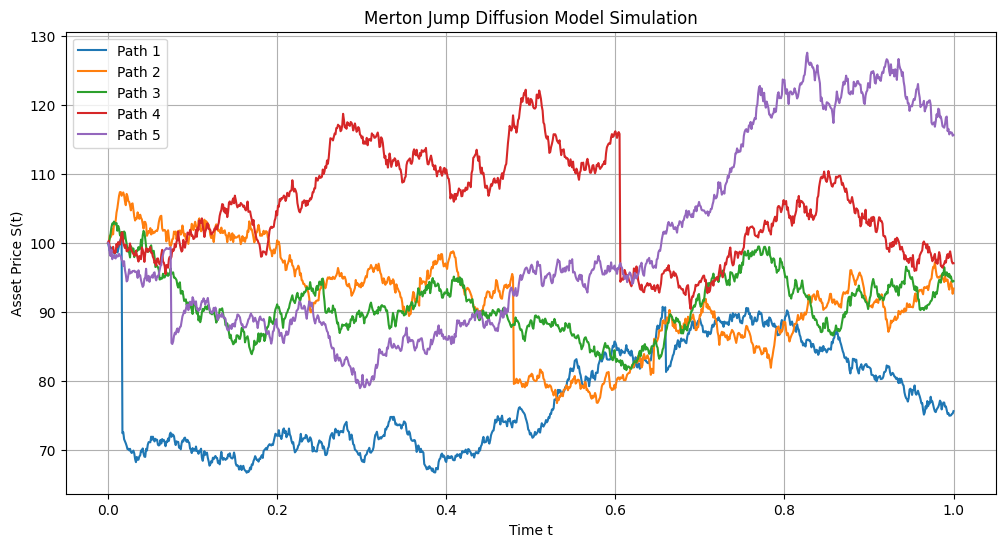

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_merton_jump_diffusion(S0, mu, sigma, lamb, mu_j, sigma_j, T, N, M):
    """
    Simulate the Merton jump diffusion model.

    Parameters:
    - S0: Initial asset price.
    - mu: Expected return (drift rate).
    - sigma: Volatility of the continuous component.
    - lamb: Jump intensity (average number of jumps per unit time).
    - mu_j: Mean of the jump size distribution (of ln(J)).
    - sigma_j: Standard deviation of the jump size distribution (of ln(J)).
    - T: Total time horizon.
    - N: Number of time steps.
    - M: Number of simulation paths.

    Returns:
    - t: Array of time points.
    - S: Matrix of simulated asset prices (M paths x N+1 time points).
    """
    dt = T / N  # Time step size
    t = np.linspace(0, T, N + 1)  # Time grid

    # Precompute constants
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt)

    # Initialize asset price paths
    S = np.zeros((M, N + 1))
    S[:, 0] = S0

    for m in range(M):
        # Initialize variables for each path
        S_m = np.zeros(N + 1)
        S_m[0] = S0

        # Generate random numbers for Brownian motion
        Z = np.random.normal(size=N)

        # Generate random numbers for jumps
        # Poisson random numbers for number of jumps in each time step
        Nt = np.random.poisson(lamb * dt, size=N)
        # Total number of jumps
        num_jumps = np.sum(Nt)
        # Generate jump sizes only where jumps occur
        if num_jumps > 0:
            jump_sizes = np.random.normal(loc=mu_j, scale=sigma_j, size=num_jumps)
        else:
            jump_sizes = np.array([])

        # Index to keep track of jump sizes
        jump_index = 0

        for i in range(1, N + 1):
            # Continuous part
            S_m[i] = S_m[i - 1] * np.exp(drift + diffusion * Z[i - 1])

            # Jump part
            if Nt[i - 1] > 0:
                # Apply jumps
                total_jump = np.sum(jump_sizes[jump_index:jump_index + Nt[i - 1]])
                S_m[i] *= np.exp(total_jump)
                jump_index += Nt[i - 1]

        S[m, :] = S_m

    return t, S

# Parameters
S0 = 100        # Initial asset price
mu = 0.1        # Expected return
sigma = 0.2     # Volatility
lamb = 1     # Jump intensity λ
k = -0.1     # Mean of ln(J) (jump sizes)
delta = 0.1   # Std dev of ln(J)
T = 1.0         # Total time (e.g., 1 year)
N = 1000        # Number of time steps
M = 5           # Number of simulation paths

# Simulate the Merton jump diffusion model
t, S = simulate_merton_jump_diffusion(S0, mu, sigma, lamb, k, delta, T, N, M)

# Plot the simulated asset price paths
plt.figure(figsize=(12, 6))
for m in range(M):
    plt.plot(t, S[m, :], label=f'Path {m + 1}')
plt.xlabel('Time t')
plt.ylabel('Asset Price S(t)')
plt.title('Merton Jump Diffusion Model Simulation')
plt.legend()
plt.grid(True)
plt.show()
